In [33]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [34]:
pokemon_df = pd.read_csv('./pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [35]:
pokemon_df = pokemon_df.set_index("#")
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [36]:
combats_df = pd.read_csv('./combats.csv')

In [37]:
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [38]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [39]:
pokemon_df["Type 2"].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [40]:
pokemon_df["Type 2"].fillna('empty',inplace=True)
pokemon_df["Type 2"].value_counts()

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Water        14
Ice          14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [41]:
print(combats_df.dtypes)
print('-' * 30)
print(pokemon_df.dtypes)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object
------------------------------
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [42]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category')
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category')
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int')
pokemon_df.dtypes

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int32
dtype: object

In [43]:
df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1'])
df_type1_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [44]:
df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2'])
df_type2_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
combine_df_one_hot = df_type1_one_hot.add(df_type2_one_hot,
                                          fill_value=0).astype('int64')
pd.options.display.max_columns = 30
pokemon_df = pokemon_df.join(combine_df_one_hot)
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

In [47]:
pokemon_df['Type 2'].cat.codes.head(10)

#
1     13
2     13
3     13
4     13
5     18
6     18
7      7
8      2
9      7
10    18
dtype: int8

In [48]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
pokemon_df.drop('Name', axis='columns', inplace=True)
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
combats_df['Winner'] = combats_df.apply(lambda x: 0
                                        if x.Winner == x.First_pokemon else 1,
                                        axis ='columns')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [51]:
data_num = combats_df.shape[0]
indexes = np.random.permutation(data_num)
train_indexes = indexes[:int(data_num * 0.6)]
val_indexes = indexes[int(data_num * 0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num * 0.8):]
train_data = combats_df.loc[train_indexes]

In [52]:
val_data = combats_df.loc[val_indexes]
test_data = combats_df.loc[test_indexes]

In [53]:
pokemon_df['Type 1'] = pokemon_df['Type 1'] / 19
pokemon_df['Type 2'] = pokemon_df['Type 2'] / 19

In [54]:
mean = pokemon_df.loc[:, 'HP':'Generation'].mean()
std = pokemon_df.loc[:, 'HP':'Generation'].std()
pokemon_df.loc[:,'HP':'Generation'] = (pokemon_df.loc[:,'HP':'Generation']-mean)/std
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
x_train_index = np.array(train_data.drop('Winner', axis='columns'))
x_val_index=np.array(val_data.drop('Winner', axis= 'columns'))
x_test_index = np.array(test_data.drop('Winner', axis= 'columns'))
print(x_train_index)

[[739 202]
 [484   9]
 [339 686]
 ...
 [369 134]
 [272 442]
 [ 38 384]]


In [57]:
y_train = np.array(train_data['Winner'])
y_val = np.array(val_data['Winner'])
y_test = np.array(test_data['Winner'])

In [58]:
pokemon_data_normal = np.array(pokemon_df.loc[:, : 'Legendary'])
print(pokemon_data_normal.shape)
x_train_normal = pokemon_data_normal[x_train_index -1].reshape((-1, 20))
x_val_normal = pokemon_data_normal[x_val_index -1].reshape((-1,20))
x_test_normal = pokemon_data_normal[x_test_index -1].reshape((-1,20))
print(x_train_normal.shape)

(800, 10)
(30000, 20)


In [59]:
pokemon_data_one_hot = np.array(pokemon_df.loc[:, 'HP':])
print(pokemon_data_one_hot.shape)
x_train_one_hot = pokemon_data_one_hot[x_train_index -1].reshape((-1, 54))
x_val_one_hot = pokemon_data_one_hot[x_val_index -1].reshape((-1, 54))
x_test_one_hot = pokemon_data_one_hot[x_test_index -1].reshape((-1, 54))
print(x_train_one_hot.shape)

(800, 27)
(30000, 54)


In [80]:
inputs = keras.Input(shape=(20, ))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                1344      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0   

In [81]:
model_1.compile(keras.optimizers.Adam(),
               loss=keras.losses.BinaryCrossentropy(),
               metrics=[keras.metrics.BinaryAccuracy()])

In [82]:
model_dir = 'lab3-logs/models'
os.makedirs(model_dir)

FileExistsError: [WinError 183] 當檔案已存在時，無法建立該檔案。: 'lab3-logs/models'

In [83]:
log_dir = os.path.join('lab3-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5',
                                            monitor='val_binary_accuracy',
                                            save_best_only=True,
                                            mode='max')

In [84]:
history_1 = model_1.fit(x_train_normal, y_train,
                       batch_size=64,
                       epochs=200,
                       validation_data=(x_val_normal, y_val),
                       callbacks=[model_cbk, model_mckp])

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.4450 - binary_accuracy: 0.8149 - val_loss: 0.3203 - val_binary_accuracy: 0.9054
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3409 - binary_accuracy: 0.8889 - val_loss: 0.2559 - val_binary_accuracy: 0.9224
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2890 - binary_accuracy: 0.9085 - val_loss: 0.2126 - val_binary_accuracy: 0.9284
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2521 - binary_accuracy: 0.9173 - val_loss: 0.2004 - val_binary_accuracy: 0.9310
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2314 - binary_accuracy: 0.9245 - val_loss: 0.1940 - val_binary_accuracy: 0.9348
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2197 - binary_accuracy: 0.9278 - val_loss: 0.1903 - val_binary_accuracy: 0.9348
Epoch 7/200
469/469 [==============================] - 1s 

469/469 [==============================] - 1s 2ms/step - loss: 0.1710 - binary_accuracy: 0.9450 - val_loss: 0.1689 - val_binary_accuracy: 0.9474
Epoch 51/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1685 - binary_accuracy: 0.9456 - val_loss: 0.1658 - val_binary_accuracy: 0.9495
Epoch 52/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1709 - binary_accuracy: 0.9455 - val_loss: 0.1663 - val_binary_accuracy: 0.9482
Epoch 53/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1679 - binary_accuracy: 0.9462 - val_loss: 0.1697 - val_binary_accuracy: 0.9486
Epoch 54/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1677 - binary_accuracy: 0.9461 - val_loss: 0.1647 - val_binary_accuracy: 0.9485
Epoch 55/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1714 - binary_accuracy: 0.9463 - val_loss: 0.1708 - val_binary_accuracy: 0.9465
Epoch 56/200
469/469 [==============================] - 1s 2ms/st

Epoch 102/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1610 - binary_accuracy: 0.9480 - val_loss: 0.1695 - val_binary_accuracy: 0.9493
Epoch 103/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1609 - binary_accuracy: 0.9481 - val_loss: 0.1674 - val_binary_accuracy: 0.9488
Epoch 104/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1591 - binary_accuracy: 0.9488 - val_loss: 0.1737 - val_binary_accuracy: 0.9475
Epoch 105/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1590 - binary_accuracy: 0.9481 - val_loss: 0.1674 - val_binary_accuracy: 0.9472
Epoch 106/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1581 - binary_accuracy: 0.9491 - val_loss: 0.1675 - val_binary_accuracy: 0.9487
Epoch 107/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1603 - binary_accuracy: 0.9477 - val_loss: 0.1710 - val_binary_accuracy: 0.9477
Epoch 108/200
469/469 [=======================

469/469 [==============================] - 1s 2ms/step - loss: 0.1532 - binary_accuracy: 0.9505 - val_loss: 0.1674 - val_binary_accuracy: 0.9478
Epoch 154/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1540 - binary_accuracy: 0.9504 - val_loss: 0.1655 - val_binary_accuracy: 0.9486
Epoch 155/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1578 - binary_accuracy: 0.9486 - val_loss: 0.1663 - val_binary_accuracy: 0.9480
Epoch 156/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1557 - binary_accuracy: 0.9494 - val_loss: 0.1631 - val_binary_accuracy: 0.9504
Epoch 157/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1531 - binary_accuracy: 0.9501 - val_loss: 0.1659 - val_binary_accuracy: 0.9487
Epoch 158/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1545 - binary_accuracy: 0.9501 - val_loss: 0.1681 - val_binary_accuracy: 0.9473
Epoch 159/200
469/469 [==============================] - 1s 

In [85]:
inputs = keras.Input(shape=(54, ))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = keras.Model(inputs, outputs, name='model-2')
model_2.summary()

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                3520      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0   

In [86]:
model_2.compile(keras.optimizers.Adam(),
               loss=keras.losses.BinaryCrossentropy(),
               metrics=[keras.metrics.BinaryAccuracy()])

In [88]:
log_dir = os.path.join('lab3-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5',
                                            monitor='val_binary_accuracy',
                                            save_best_only=True,
                                            mode='max')

In [89]:
history_2 = model_2.fit(x_train_one_hot, y_train,
                       batch_size=64,
                       epochs=200,
                       validation_data=(x_val_one_hot, y_val),
                       callbacks=[model_cbk, model_mckp])

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.4312 - binary_accuracy: 0.8191 - val_loss: 0.3197 - val_binary_accuracy: 0.9004
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3244 - binary_accuracy: 0.8897 - val_loss: 0.2480 - val_binary_accuracy: 0.9217
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2726 - binary_accuracy: 0.9061 - val_loss: 0.2084 - val_binary_accuracy: 0.9253
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2427 - binary_accuracy: 0.9145 - val_loss: 0.1997 - val_binary_accuracy: 0.9289
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2216 - binary_accuracy: 0.9195 - val_loss: 0.1812 - val_binary_accuracy: 0.9320
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2064 - binary_accuracy: 0.9228 - val_loss: 0.1733 - val_binary_accuracy: 0.9345
Epoch 7/200
469/469 [==============================] - 1s 

469/469 [==============================] - 1s 2ms/step - loss: 0.0971 - binary_accuracy: 0.9608 - val_loss: 0.1005 - val_binary_accuracy: 0.9632
Epoch 51/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0953 - binary_accuracy: 0.9620 - val_loss: 0.1069 - val_binary_accuracy: 0.9619
Epoch 52/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0963 - binary_accuracy: 0.9618 - val_loss: 0.1064 - val_binary_accuracy: 0.9613
Epoch 53/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0948 - binary_accuracy: 0.9631 - val_loss: 0.1081 - val_binary_accuracy: 0.9635
Epoch 54/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0959 - binary_accuracy: 0.9621 - val_loss: 0.1035 - val_binary_accuracy: 0.9631
Epoch 55/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0945 - binary_accuracy: 0.9629 - val_loss: 0.1025 - val_binary_accuracy: 0.9621
Epoch 56/200
469/469 [==============================] - 1s 2ms/st

Epoch 102/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0814 - binary_accuracy: 0.9694 - val_loss: 0.1034 - val_binary_accuracy: 0.9623
Epoch 103/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0803 - binary_accuracy: 0.9683 - val_loss: 0.1169 - val_binary_accuracy: 0.9623
Epoch 104/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - binary_accuracy: 0.9690 - val_loss: 0.1052 - val_binary_accuracy: 0.9611
Epoch 105/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0799 - binary_accuracy: 0.9687 - val_loss: 0.1101 - val_binary_accuracy: 0.9610
Epoch 106/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0809 - binary_accuracy: 0.9681 - val_loss: 0.1056 - val_binary_accuracy: 0.9597
Epoch 107/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0841 - binary_accuracy: 0.9671 - val_loss: 0.1082 - val_binary_accuracy: 0.9630
Epoch 108/200
469/469 [=======================

469/469 [==============================] - 1s 2ms/step - loss: 0.0711 - binary_accuracy: 0.9720 - val_loss: 0.0968 - val_binary_accuracy: 0.9653
Epoch 154/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0726 - binary_accuracy: 0.9708 - val_loss: 0.1021 - val_binary_accuracy: 0.9632
Epoch 155/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0768 - binary_accuracy: 0.9692 - val_loss: 0.0991 - val_binary_accuracy: 0.9654
Epoch 156/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0748 - binary_accuracy: 0.9702 - val_loss: 0.1007 - val_binary_accuracy: 0.9659
Epoch 157/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0719 - binary_accuracy: 0.9714 - val_loss: 0.1074 - val_binary_accuracy: 0.9643
Epoch 158/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0686 - binary_accuracy: 0.9727 - val_loss: 0.1147 - val_binary_accuracy: 0.9638
Epoch 159/200
469/469 [==============================] - 1s 

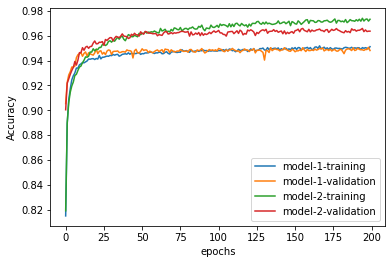

In [90]:
plt.plot(history_1.history['binary_accuracy'], label='model-1-training')
plt.plot(history_1.history['val_binary_accuracy'], label='model-1-validation')
plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

In [91]:
model_1.load_weights(model_dir + '/Best-model-1.h5')
model_2.load_weights(model_dir + '/Best-model-2.h5')
loss_1, accuracy_1 = model_1.evaluate(x_test_normal, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test_one_hot, y_test)
print("Model-1: {}%\nModel-2: {}%".format(accuracy_1, accuracy_2))

313/313 [==============================] - 0s 684us/step - loss: 0.1003 - binary_accuracy: 0.9662
Model-1: 0.9524000287055969%
Model-2: 0.9661999940872192%


In [92]:
venusaur = np.expand_dims(pokemon_data_one_hot[3], axis=0)
charizard = np.expand_dims(pokemon_data_one_hot[7], axis=0)
blastoise = np.expand_dims(pokemon_data_one_hot[12], axis=0)

In [93]:
pred = model_2.predict(np.concatenate([venusaur, charizard], axis=-1))
winner = '妙娃花' if pred < 0.5 else '噴火龍'
print("pred={}, {} 獲勝".format(pred, winner))

pred = model_2.predict(np.concatenate([charizard, blastoise], axis=-1))
winner = '噴火龍' if pred < 0.5 else '水箭龜'
print("pred={}, {} 獲勝".format(pred, winner))

pred = model_2.predict(np.concatenate([blastoise, venusaur], axis=-1))
winner = '水箭龜' if pred < 0.5 else '妙娃花'
print("pred={}, {} 獲勝".format(pred, winner))

pred=[[0.9994354]], 噴火龍 獲勝
pred=[[1.1763291e-05]], 噴火龍 獲勝
pred=[[0.999773]], 妙娃花 獲勝
